## Part 3.4 
Keeping the above two adjustments, replace your simple RNN model in Part 2 with a Convolutional Neural Network (CNN) to produce sentence representations and perform sentiment
classification.

In [1]:
from datasets import load_dataset
from utils.cnn_model import *
from utils.cnn_utils import *
from utils.utils import *
from dotenv import load_dotenv
import os

load_dotenv()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Data preparation

In [2]:
dataset = load_dataset("rotten_tomatoes")
trn_dataset = dataset["train"]
val_dataset = dataset["validation"]
tst_dataset = dataset["test"]

In [3]:
# Obtain a list of unique words from the train set

sentences = trn_dataset["text"]
words = []

for i in range(len(sentences)):
    sentences[i] = simple_preprocess(sentences[i])

for sentence in sentences:
    for word in sentence:
        if word not in words:
            words.append(word)

# Pass it in to the load_word2vec function along w the relative filepath of the embedding file
word2vec_model = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")

In [4]:
word_index = {
    word: i for i, word in enumerate(
        word2vec_model.index_to_key
    )
}

Dataloaders

In [5]:
trn_sentences, trn_labels = prepare_data(
    trn_dataset["text"],
    trn_dataset["label"],
    word_index=word_index
)
val_sentences, val_labels = prepare_data(
    val_dataset["text"],
    val_dataset["label"],
    word_index=word_index
)
tst_sentences, tst_labels = prepare_data(
    tst_dataset["text"],
    tst_dataset["label"],
    word_index=word_index
)

In [6]:
BATCH_SIZE = 32

trn_dataloader = create_dataloader(
    trn_sentences,
    trn_labels,
    BATCH_SIZE,
    shuffle=True)
val_dataloader = create_dataloader(
    val_sentences,
    val_labels,
    BATCH_SIZE,
    shuffle=False)
tst_dataloader = create_dataloader(
    tst_sentences,
    tst_labels,
    BATCH_SIZE,
    shuffle=False)

# Model

In [7]:
model = CNNModel(
    embedding_dim=350,
    embedding_matrix=word2vec_model.vectors,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
)

In [8]:
train_losses, val_accuracies = train_cnn(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    optimizer=torch.optim.Adam(model.parameters(), lr=0.0001),
    version="1",
    model_save_path="modelfiles/",
    model_type="cnn",
    epochs=100,
    criterion=nn.BCELoss(),
    early_stopping_patience=10,
    load_best_model_at_end=True
)

Epoch 1/100: 100%|██████████| 267/267 [00:01<00:00, 137.62batch/s]


Accuracy: 0.5704
Epoch 1/100, Training Loss: 0.6901, Validation Accuracy: 0.5704
Model saved.


Epoch 2/100: 100%|██████████| 267/267 [00:01<00:00, 161.55batch/s]


Accuracy: 0.5769
Epoch 2/100, Training Loss: 0.6712, Validation Accuracy: 0.5769
Model saved.


Epoch 3/100: 100%|██████████| 267/267 [00:01<00:00, 162.57batch/s]


Accuracy: 0.6079
Epoch 3/100, Training Loss: 0.6480, Validation Accuracy: 0.6079
Model saved.


Epoch 4/100: 100%|██████████| 267/267 [00:01<00:00, 161.56batch/s]


Accuracy: 0.6360
Epoch 4/100, Training Loss: 0.6141, Validation Accuracy: 0.6360
Model saved.


Epoch 5/100: 100%|██████████| 267/267 [00:01<00:00, 161.69batch/s]


Accuracy: 0.6660
Epoch 5/100, Training Loss: 0.5628, Validation Accuracy: 0.6660
Model saved.


Epoch 6/100: 100%|██████████| 267/267 [00:01<00:00, 162.63batch/s]


Accuracy: 0.6848
Epoch 6/100, Training Loss: 0.4956, Validation Accuracy: 0.6848
Model saved.


Epoch 7/100: 100%|██████████| 267/267 [00:01<00:00, 161.60batch/s]


Accuracy: 0.7111
Epoch 7/100, Training Loss: 0.4237, Validation Accuracy: 0.7111
Model saved.


Epoch 8/100: 100%|██████████| 267/267 [00:01<00:00, 160.59batch/s]


Accuracy: 0.7092
Epoch 8/100, Training Loss: 0.3518, Validation Accuracy: 0.7092


Epoch 9/100: 100%|██████████| 267/267 [00:01<00:00, 160.28batch/s]


Accuracy: 0.7186
Epoch 9/100, Training Loss: 0.2896, Validation Accuracy: 0.7186
Model saved.


Epoch 10/100: 100%|██████████| 267/267 [00:01<00:00, 157.32batch/s]


Accuracy: 0.7129
Epoch 10/100, Training Loss: 0.2370, Validation Accuracy: 0.7129


Epoch 11/100: 100%|██████████| 267/267 [00:01<00:00, 160.40batch/s]


Accuracy: 0.7167
Epoch 11/100, Training Loss: 0.1943, Validation Accuracy: 0.7167


Epoch 12/100: 100%|██████████| 267/267 [00:01<00:00, 158.08batch/s]


Accuracy: 0.7186
Epoch 12/100, Training Loss: 0.1588, Validation Accuracy: 0.7186


Epoch 13/100: 100%|██████████| 267/267 [00:01<00:00, 160.18batch/s]


Accuracy: 0.7083
Epoch 13/100, Training Loss: 0.1325, Validation Accuracy: 0.7083


Epoch 14/100: 100%|██████████| 267/267 [00:01<00:00, 158.68batch/s]


Accuracy: 0.7045
Epoch 14/100, Training Loss: 0.1060, Validation Accuracy: 0.7045


Epoch 15/100: 100%|██████████| 267/267 [00:01<00:00, 154.54batch/s]


Accuracy: 0.7054
Epoch 15/100, Training Loss: 0.0890, Validation Accuracy: 0.7054


Epoch 16/100: 100%|██████████| 267/267 [00:01<00:00, 157.22batch/s]


Accuracy: 0.7036
Epoch 16/100, Training Loss: 0.0724, Validation Accuracy: 0.7036


Epoch 17/100: 100%|██████████| 267/267 [00:01<00:00, 157.85batch/s]


Accuracy: 0.7054
Epoch 17/100, Training Loss: 0.0600, Validation Accuracy: 0.7054


Epoch 18/100: 100%|██████████| 267/267 [00:01<00:00, 156.18batch/s]


Accuracy: 0.7054
Epoch 18/100, Training Loss: 0.0489, Validation Accuracy: 0.7054


Epoch 19/100: 100%|██████████| 267/267 [00:01<00:00, 159.70batch/s]


Accuracy: 0.7036
Epoch 19/100, Training Loss: 0.0411, Validation Accuracy: 0.7036
Early stopping triggered after 19 epochs.
Training ended, loading best model...
Model loaded.


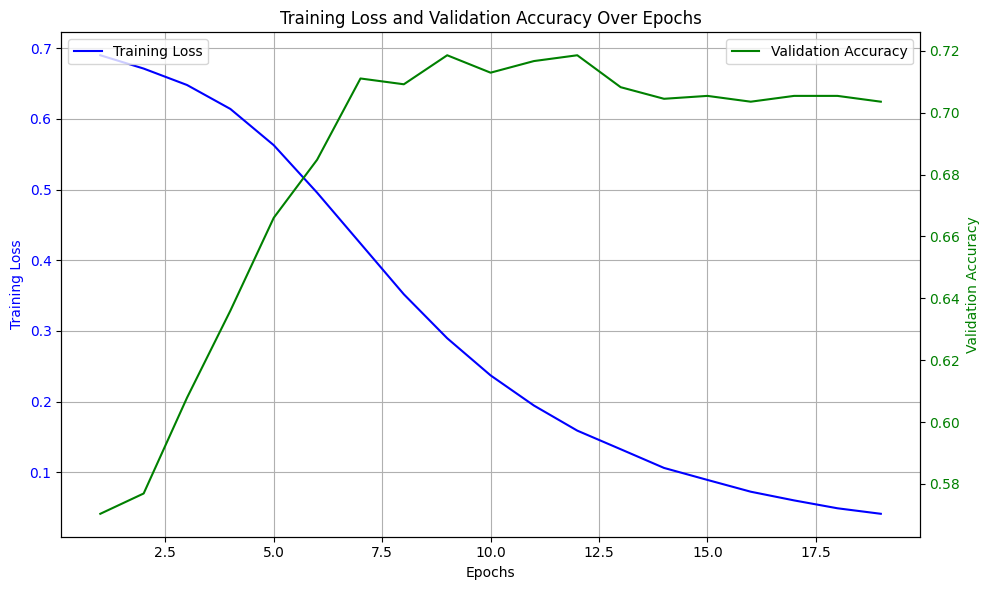

In [9]:
plot_training_progress(train_losses, val_accuracies)

In [10]:
test_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7355


# Results

In [11]:
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.7355


Observation and comparison here! Thanks guys :)